## Trabalhando com o relatório Posição de Coleta

### Extração dos dados

#### Carregando *packages*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import camelot

#### Determinação dos campos de interesse

In [2]:
#Extraindo tabela na página
tables = camelot.read_pdf("PosicaoDeColeta_01-10-22.pdf", 
                           flavor='stream', 
                           pages='1')
tables[0].df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,,,ODELO,PREVISTO,TOTAL,,,,,%,...,,%,,%,,,,,,Nada
1,UF,AGÊNCIA M,,,,,,,Tot,Abor,...,Tot,Colet,Tot,Colet,,,,,,Feito
2,,,C,59.939,56.557,"94,36",55.909,"98,85",18.883,"33,77",...,49.529,"98,12",947,"1,88",50.476,"84,21",51.444,"85,83",588,84
3,BR,,S,21.752,17.975,"82,64",17.569,"97,74",5.043,"28,70",...,13.070,"96,41",486,"3,59",13.556,"62,32",16.679,"76,68",644,132
4,,,T,81.691,74.532,"91,24",73.478,"98,59",23.926,"32,56",...,62.599,"97,76",1.433,"2,24",64.032,"78,38",68.123,"83,39",1.232,216
5,,,C,730,578,"79,18",559,"96,71",48,"8,59",...,534,"95,19",27,"4,81",561,"76,85",632,"86,58",17,1
6,,Total RN,S,412,281,"68,20",262,"93,24",17,"6,49",...,224,"94,51",13,"5,49",237,"57,52",361,"87,62",9,0
7,RN,,T,1.142,859,"75,22",821,"95,58",65,"7,92",...,758,"94,99",40,"5,01",798,"69,88",993,"86,95",26,1
8,,,C,18,11,"61,11",10,"90,91",0,0,...,14,0,0,0,14,"77,78",15,"83,33",2,0
9,,Pau dos,,,,,,,,,...,,,,,,,,,,


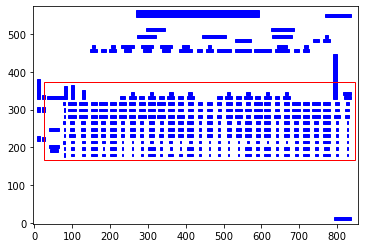

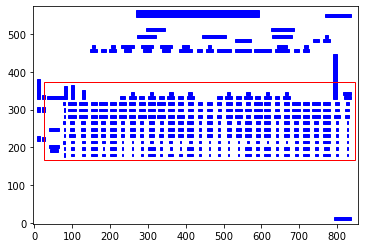

In [3]:
#Auxílio visual para determinação da área de seleção, contendo os campos de interesse da tabela
camelot.plot(tables[0], kind='contour')

#### Definindo função para extração de uma tabela de cada página do relatório

In [4]:
#Extraindo tabelas de áreas específicas do arquivo
def extract_table(filename: str, page: int):
    tables = camelot.read_pdf(filename, 
                              flavor='stream', 
                              pages=f'{page}', 
                              table_areas = ['80,320,110,140', '520,320,540,140', '680,320,700,140', '780,320,850,140'])

    frames = [table.df for table in tables]
    table = pd.concat(frames, axis = 1, ignore_index = True)
    table.columns = ['Modelo','Previsto','FAC','Questionarios enviados', 'Abordagem em Andamento','Nada feito']
    if (page == 1 or page == 3):
        agencia = ['BR', 'BR', 'BR', 'RN', 'RN', 'RN', 'Pau dos Ferros', 'Pau dos Ferros', 'Pau dos Ferros']
    else:
        agencia = ['BR', 'BR', 'RN', 'RN', 'Pau dos Ferros', 'Pau dos Ferros']
    table.insert(0, 'Agencia', agencia)
    return table

#### Dataframe para cada umas das pesquisas

In [5]:
#Pesquisa Anual de Comercio (PAC)
pac = extract_table("PosicaoDeColeta_01-10-22.pdf", 1)
pac.insert(1, 'Pesquisa', 'PAC')
#Pesquisa Anual de Serviços (PAS)
pas = extract_table("PosicaoDeColeta_01-10-22.pdf", 2)
pas.insert(1, 'Pesquisa', 'PAS')
#Pesquisa da Industria Anual (PIA)
pia = extract_table("PosicaoDeColeta_01-10-22.pdf", 3)
pia.insert(1, 'Pesquisa', 'PIA')
#Pesquisa da Industria Anual da Construção (PAIC)
paic = extract_table("PosicaoDeColeta_01-10-22.pdf", 4)
paic.insert(1, 'Pesquisa', 'PAIC')

C:\Users\luizf\anaconda3\lib\site-packages\camelot\parsers\stream.py:365: UserWarning: No tables found in table area 2
  warnings.warn(f"No tables found in table area {table_idx + 1}")
C:\Users\luizf\anaconda3\lib\site-packages\camelot\parsers\stream.py:365: UserWarning: No tables found in table area 3
  warnings.warn(f"No tables found in table area {table_idx + 1}")
C:\Users\luizf\anaconda3\lib\site-packages\camelot\parsers\stream.py:365: UserWarning: No tables found in table area 2
  warnings.warn(f"No tables found in table area {table_idx + 1}")
C:\Users\luizf\anaconda3\lib\site-packages\camelot\parsers\stream.py:365: UserWarning: No tables found in table area 3
  warnings.warn(f"No tables found in table area {table_idx + 1}")
C:\Users\luizf\anaconda3\lib\site-packages\camelot\parsers\stream.py:365: UserWarning: No tables found in table area 2
  warnings.warn(f"No tables found in table area {table_idx + 1}")
C:\Users\luizf\anaconda3\lib\site-packages\camelot\parsers\stream.py:365: U

#### Criação de um Dataframe único para as Pesquisas Econômicas Anuais

In [6]:
df_pea = pd.concat([pac, pas, pia, paic]).reset_index(drop = True)
#As pesquisas PAS e PAIC contem apenas um modelo, por isso, removemos os valores duplicados
df_pea = df_pea.query("Modelo != 'X'")
display(df_pea)

,Agencia,Pesquisa,Modelo,Previsto,FAC,Questionarios enviados,Abordagem em Andamento,Nada feito
0,BR,PAC,C,59.939,968,50.476,588,84
1,BR,PAC,S,21.752,3.123,13.556,644,132
2,BR,PAC,T,81.691,4.091,64.032,1.232,216
3,RN,PAC,C,730,71,561,17,1
4,RN,PAC,S,412,124,237,9,0
5,RN,PAC,T,1.142,195,798,26,1
6,Pau dos Ferros,PAC,C,18,1,14,2,0
7,Pau dos Ferros,PAC,S,19,6,13,0,0
8,Pau dos Ferros,PAC,T,37,7,27,2,0
9,BR,PAS,T,123.555,10.408,89.011,2.659,423
